In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
# Function for extracting data from eurostat 

def get_eurostat_datasets(dataset_name):
    csv_url = f"https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/data/{dataset_name}/?format=SDMX-CSV&lang=en&label=label_only"
    return pd.read_csv(csv_url)

In [3]:
# Print all the column values

def get_column_values(dataset):
    unique_column_values = {}
    for column in dataset.columns:
        if dataset[column].dtype == object:
            unique_column_values.update({column: dataset[column].unique()})

    return unique_column_values

In [4]:
# Get frequencies by alcohol consumption datasets

freq_education = get_eurostat_datasets('hlth_ehis_al1e')
freq_income = get_eurostat_datasets('hlth_ehis_al1i')
freq_urbanisation = get_eurostat_datasets('hlth_ehis_al1u')

# Drop unnecessary columns
freq_education = freq_education.drop(['freq','unit','DATAFLOW', 'LAST UPDATE'], axis=1)
freq_income = freq_income.drop(['freq','unit','DATAFLOW', 'LAST UPDATE'], axis=1)
freq_urbanisation = freq_urbanisation.drop(['freq','unit','DATAFLOW', 'LAST UPDATE'], axis=1)

# Drop rows with missing OBS_VALUE
freq_education_cleaned = freq_education.dropna(subset=['OBS_VALUE'])
freq_income_cleaned = freq_income.dropna(subset=['OBS_VALUE'])
freq_urbanisation_cleaned = freq_urbanisation.dropna(subset=['OBS_VALUE'])

freq_education_cleaned.head()
freq_income_cleaned.head()
freq_urbanisation_cleaned.head()

,frequenc,deg_urb,sex,age,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,Every day,Cities,Females,Total,Austria,2014,3.7,NaN
1,Every day,Cities,Females,Total,Austria,2019,3.3,NaN
2,Every day,Cities,Females,Total,Belgium,2014,11.1,u
3,Every day,Cities,Females,Total,Belgium,2019,7.9,NaN
4,Every day,Cities,Females,Total,Bulgaria,2014,4.6,NaN


In [5]:
get_column_values(freq_education)

{'frequenc': array(['Every day', 'Less than once a month', 'Every month',
        'Not in the last 12 months', 'Never',
        'Never or not in the last 12 months', 'Every week'], dtype=object),
 'isced11': array(['Less than primary, primary and lower secondary education (levels 0-2)',
        'Upper secondary and post-secondary non-tertiary education (levels 3 and 4)',
        'Tertiary education (levels 5-8)', 'All ISCED 2011 levels'],
       dtype=object),
 'sex': array(['Females', 'Males', 'Total'], dtype=object),
 'age': array(['Total', 'From 15 to 19 years', 'From 15 to 24 years',
        'From 15 to 29 years', 'From 15 to 64 years',
        'From 18 to 24 years', 'From 18 to 44 years',
        'From 18 to 64 years', 'From 20 to 24 years',
        'From 25 to 29 years', 'From 25 to 34 years',
        'From 25 to 64 years', 'From 35 to 44 years',
        'From 45 to 54 years', 'From 45 to 64 years',
        'From 55 to 64 years', 'From 65 to 74 years', '18 years or over',
       

In [6]:
# Get frequencies of heavy episodic drinking 

freq_heavy_education = get_eurostat_datasets('hlth_ehis_al3e')
freq_heavy_income = get_eurostat_datasets('hlth_ehis_al3i')
freq_heavy_urbanisation = get_eurostat_datasets('hlth_ehis_al3u')

In [74]:
get_column_values(freq_heavy_education)

{'DATAFLOW': array(['ESTAT:HLTH_EHIS_AL3E(1.0)'], dtype=object),
 'LAST UPDATE': array(['01/04/22 23:00:00'], dtype=object),
 'freq': array(['Annual'], dtype=object),
 'unit': array(['Percentage'], dtype=object),
 'frequenc': array(['At least once a week', 'Less than once a month', 'Every month',
        'Never or not in the last 12 months'], dtype=object),
 'isced11': array(['Less than primary, primary and lower secondary education (levels 0-2)',
        'Upper secondary and post-secondary non-tertiary education (levels 3 and 4)',
        'Tertiary education (levels 5-8)', 'All ISCED 2011 levels'],
       dtype=object),
 'sex': array(['Females', 'Males', 'Total'], dtype=object),
 'age': array(['Total', 'From 15 to 19 years', 'From 15 to 24 years',
        'From 15 to 29 years', 'From 15 to 64 years',
        'From 18 to 24 years', 'From 18 to 44 years',
        'From 18 to 64 years', 'From 20 to 24 years',
        'From 25 to 29 years', 'From 25 to 34 years',
        'From 25 to 64 ye

In [75]:
# Get frequencies of hazardous drinking 

freq_haz_education = get_eurostat_datasets('hlth_ehis_al2e')
freq_haz_income = get_eurostat_datasets('hlth_ehis_al2i')
freq_haz_urbanisation = get_eurostat_datasets('hlth_ehis_al2u')

In [76]:
get_column_values(freq_haz_education)

{'DATAFLOW': array(['ESTAT:HLTH_EHIS_AL2E(1.0)'], dtype=object),
 'LAST UPDATE': array(['21/03/19 23:00:00'], dtype=object),
 'freq': array(['Annual'], dtype=object),
 'unit': array(['Percentage'], dtype=object),
 'isced11': array(['Less than primary, primary and lower secondary education (levels 0-2)',
        'Upper secondary and post-secondary non-tertiary education (levels 3 and 4)',
        'Tertiary education (levels 5-8)', 'All ISCED 2011 levels'],
       dtype=object),
 'sex': array(['Females', 'Males', 'Total'], dtype=object),
 'age': array(['Total', 'From 15 to 24 years', 'From 15 to 29 years',
        'From 15 to 64 years', 'From 18 to 24 years',
        'From 18 to 44 years', 'From 18 to 64 years',
        'From 25 to 34 years', 'From 25 to 64 years',
        'From 35 to 44 years', 'From 45 to 54 years',
        'From 45 to 64 years', 'From 55 to 64 years',
        'From 65 to 74 years', '18 years or over', '65 years or over',
        '75 years or over', 'From 15 to 19 year

**Explanatory analysis of alcohol consumption datasets**

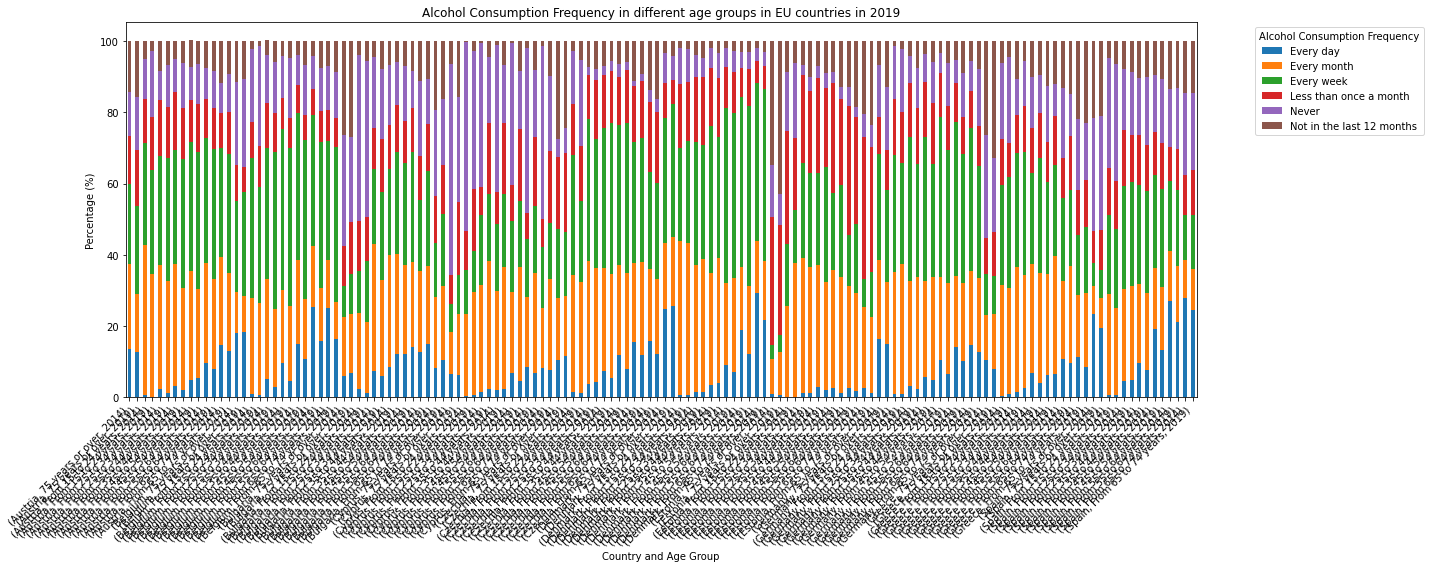

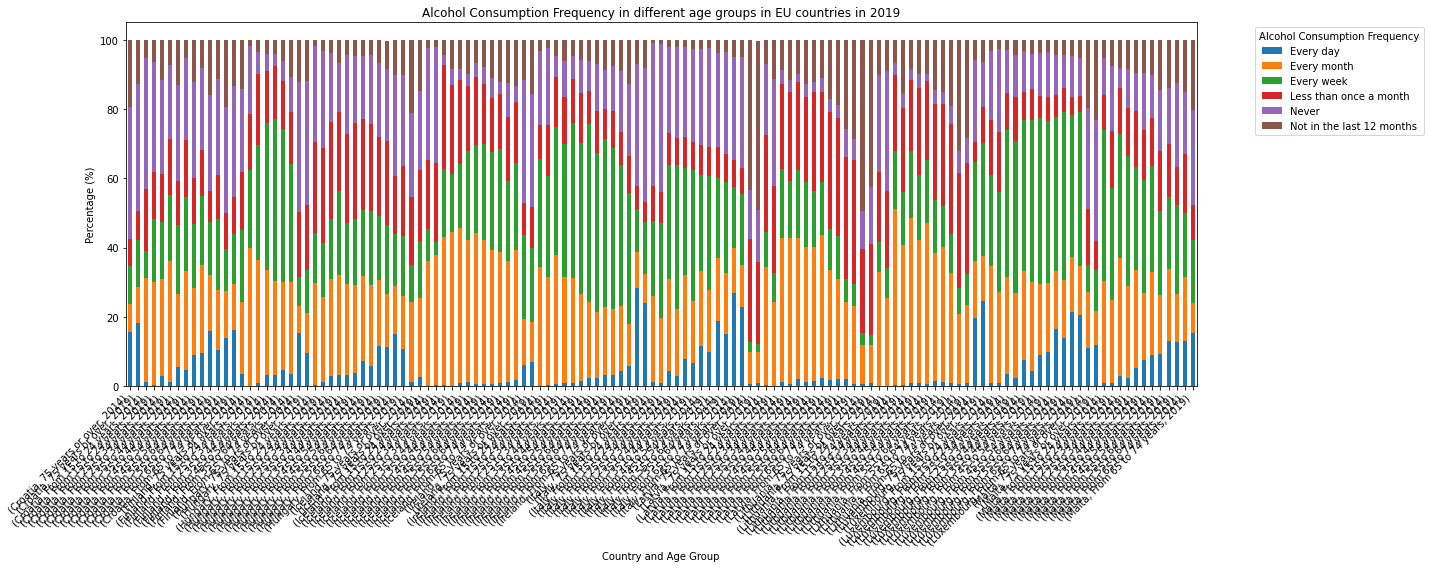

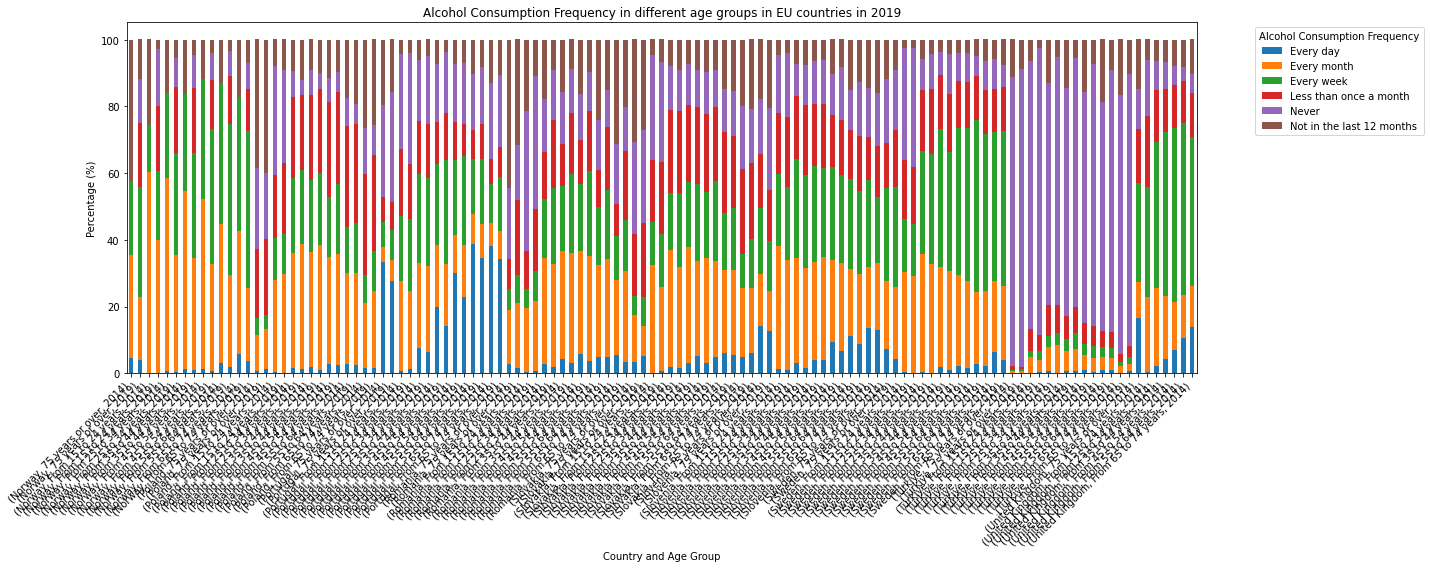

In [107]:
age_groups = ['From 15 to 24 years', 'From 25 to 34 years','From 35 to 44 years','From 45 to 54 years', 'From 55 to 64 years', 'From 65 to 74 years', '75 years or over']
freq = ['Every day','Less than once a month','Every month','Not in the last 12 months', 'Never','Every week']

freq_education_eu = freq_education[(freq_education['age'].isin(age_groups)) 
                #& (freq_education['geo'] == 'European Union - 27 countries (from 2020)') 
                & (freq_education['sex'] == 'Total')
                #& (freq_education['TIME_PERIOD'] == 2019)
                & (freq_education['isced11'] == 'All ISCED 2011 levels')
                & (freq_education['frequenc'].isin(freq))
                ]

get_column_values(freq_education_eu)

def create_stacked_bar_plot(eu_countries):
    pivot_df = pd.pivot_table(freq_education_eu[freq_education_eu['geo'].isin(eu_countries)], 
                          index=['geo', 'age', 'TIME_PERIOD'],   # Multiple rows
                          columns='frequenc', 
                          values='OBS_VALUE',    # Values to populate the table
                          aggfunc='sum')  # Aggregation function (e.g., sum, mean)

    ax = pivot_df.plot(kind='bar', stacked=True, figsize=(20, 8))

    # Adding labels and title
    plt.xlabel('Country and Age Group')
    plt.ylabel('Percentage (%)')
    plt.title('Alcohol Consumption Frequency in different age groups in EU countries in 2019')
    plt.xticks(rotation=45, ha='right')

    # Adding a legend
    plt.legend(title='Alcohol Consumption Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Adjust layout to avoid overlap
    plt.tight_layout()

    # Show the plot
    plt.show()

eu_1 = ['Austria', 'Belgium', 'Bulgaria', 'Cyprus', 'Czechia', 'Germany','Denmark', 'Estonia', 'Greece', 'Spain']

eu_2 = ['Finland', 'Croatia', 'Hungary', 'Ireland', 'Iceland', 'Italy', 'Lithuania','Luxembourg', 'Latvia', 'Malta', ]
        
eu_3 = ['Norway', 'Poland', 'Portugal','Romania', 'Sweden', 'Slovenia', 'Slovakia', 'Türkiye', 'United Kingdom']

create_stacked_bar_plot(eu_1)
create_stacked_bar_plot(eu_2)
create_stacked_bar_plot(eu_3)

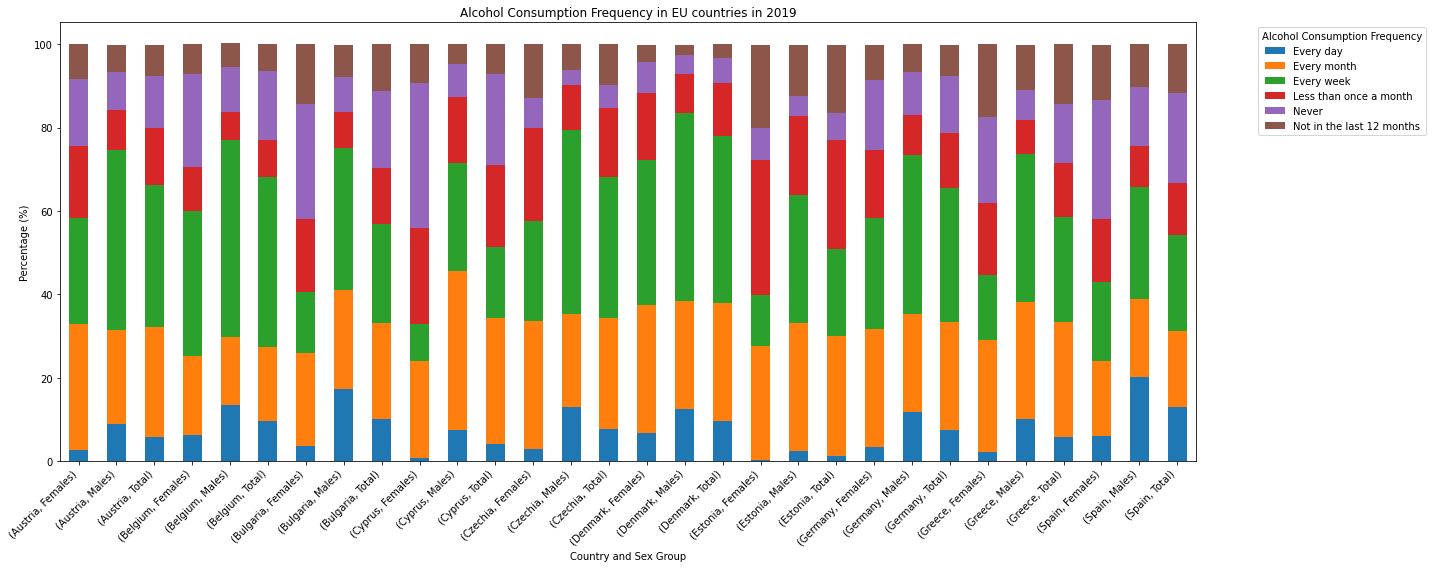

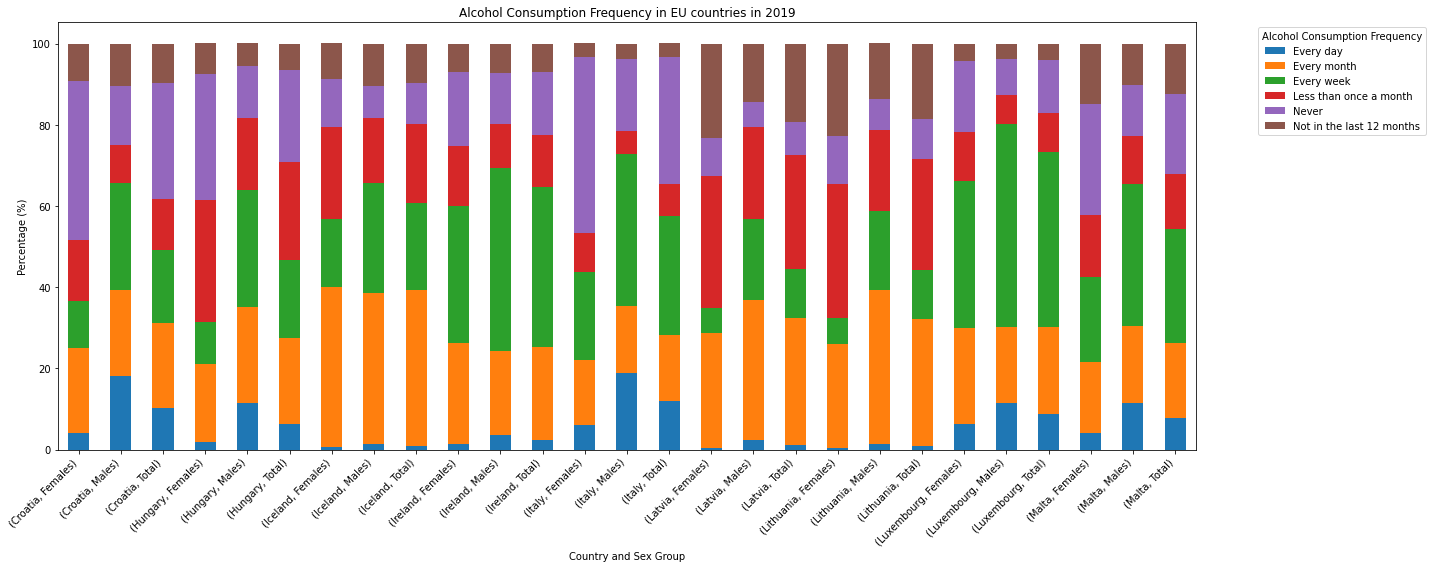

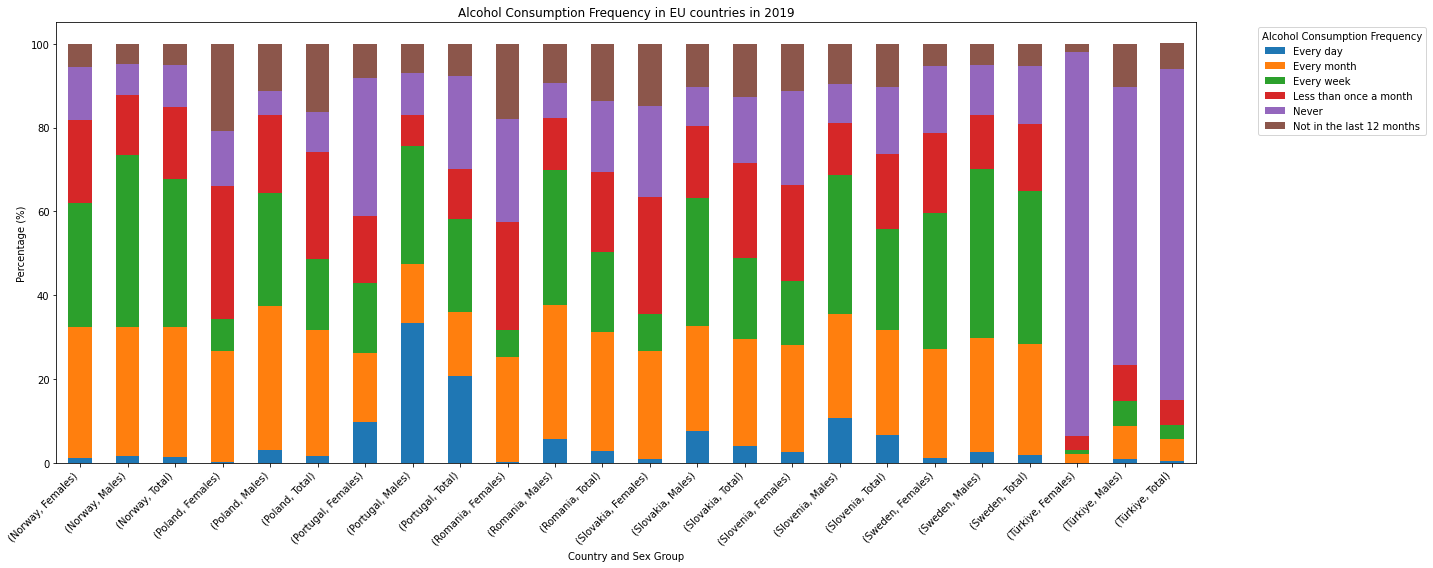

In [108]:
freq_education_eu_sex = freq_education[(freq_education['age'] == 'Total') 
                #& (freq_education['geo'] == 'European Union - 27 countries (from 2020)') 
                #& (freq_education['sex'].isin(['Males, Females']))
                & (freq_education['TIME_PERIOD'] == 2019)
                & (freq_education['isced11'] == 'All ISCED 2011 levels')
                & (freq_education['frequenc'].isin(freq))
                ]

def create_stacked_bar_plot(eu_countries):
    pivot_df = pd.pivot_table(freq_education_eu_sex[freq_education_eu_sex['geo'].isin(eu_countries)], 
                          index=['geo', 'sex'],   # Multiple rows
                          columns='frequenc', 
                          values='OBS_VALUE',    # Values to populate the table
                          aggfunc='sum')  # Aggregation function (e.g., sum, mean)

    ax = pivot_df.plot(kind='bar', stacked=True, figsize=(20, 8))

    # Adding labels and title
    plt.xlabel('Country and Sex Group')
    plt.ylabel('Percentage (%)')
    plt.title('Alcohol Consumption Frequency in EU countries in 2019')
    plt.xticks(rotation=45, ha='right')

    # Adding a legend
    plt.legend(title='Alcohol Consumption Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Adjust layout to avoid overlap
    plt.tight_layout()

    # Show the plot
    plt.show()

eu_1 = ['Austria', 'Belgium', 'Bulgaria', 'Cyprus', 'Czechia', 'Germany','Denmark', 'Estonia', 'Greece', 'Spain']

eu_2 = ['Finland', 'Croatia', 'Hungary', 'Ireland', 'Iceland', 'Italy', 'Lithuania','Luxembourg', 'Latvia', 'Malta', ]
        
eu_3 = ['Norway', 'Poland', 'Portugal','Romania', 'Sweden', 'Slovenia', 'Slovakia', 'Türkiye', 'United Kingdom']

create_stacked_bar_plot(eu_1)
create_stacked_bar_plot(eu_2)
create_stacked_bar_plot(eu_3)